In [5]:
%%capture
%run ./algorithm/read_data.ipynb

### SVM

In [6]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [42]:
train_test_report(svr)

Train score: 		         0.9421
Test score: 		         0.9393


<Figure size 432x288 with 0 Axes>

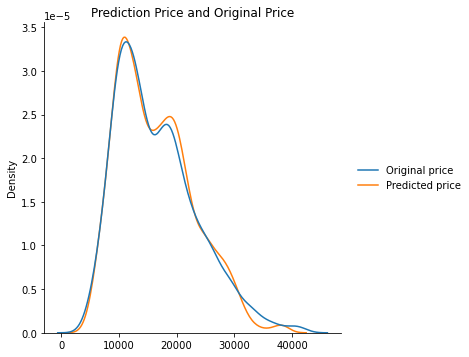

In [43]:
plot_prediction_compare_ori(svr)

<Figure size 432x288 with 0 Axes>

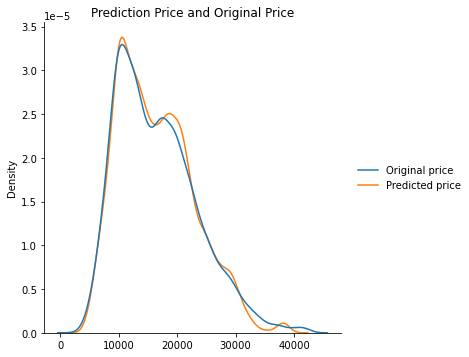

In [44]:
plot_prediction_compare_ori(svr, X_train, y_train)

### Find best parameters using grid search

In [3]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
param_grid = {
    'C': [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 1, 10, 5],
    'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
}

In [15]:
svr_tuned = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=100, cv=3, random_state=42, n_jobs=-1)
svr_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(C=1000.0, gamma=0.1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 0.1, 1, 10, 100,
                                              1000],
                                        'epsilon': [0.0001, 0.0005, 0.001,
                                                    0.005, 0.01, 0.05, 0.1, 0.5,
                                                    1, 5, 10],
                                        'gamma': [0.001, 0.01, 1, 10, 5]},
                   random_state=42)

In [16]:
gs_report(svr_tuned)

Best score: 			         0.9088
Best parameters: 		{'gamma': 0.01, 'epsilon': 1, 'C': 1000}
Best estimator: 		SVR(C=1000, epsilon=1, gamma=0.01)


### Decomposition using PCA

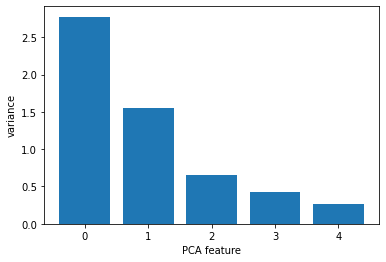

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_transformed = pca.fit_transform(X_train)
pc = pca.components_

nfeatures = range(pca.n_components_)
plt.bar(nfeatures, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(nfeatures)
plt.show()

In [31]:
X_train_transformed.shape

(10552, 5)

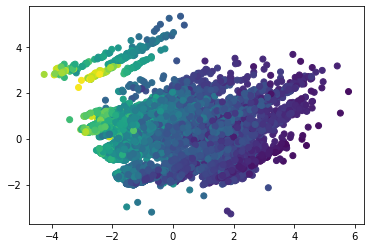

In [34]:
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train)
plt.show()

In [49]:
svr.fit(X_train_transformed, y_train)

SVR(C=1000.0, gamma=0.1)

In [54]:
regression_report(svr.predict(pca.fit_transform(X_test)))

Accuracy score: 			         0.8794
R-squared score: 			         0.8768
Mean Absolute Error(MAE): 		      1812.7252
Mean Squared Error (MSE): 		   5975314.7025
Root Mean Squared Error (RSME): 	      2444.4457
Root Mean Squared Log Error (RSMLE): 	         0.1500


<Figure size 432x288 with 0 Axes>

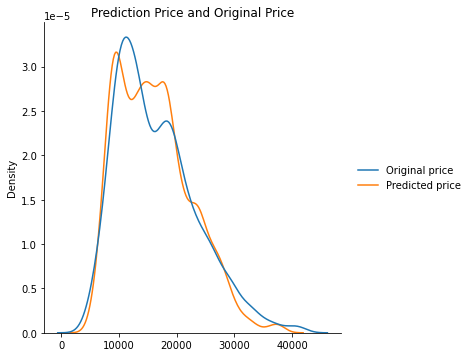

In [55]:
plot_prediction_compare_ori(svr, pca.fit_transform(X_test), y_test)